<a href="https://colab.research.google.com/github/gioguarnieri/Materias_Doutorado_INPE/blob/main/Estat%C3%ADstica_Computacional/Exerc%C3%ADcio_2_Giovanni_Guarnieri_Soares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2 from Computational Statistics Class
Name: Giovanni Guarnieri Soares

Lecturer: Valdivino

In [ ]:
# capture is a magic command to capture the output
%%capture
!pip install -U kaleido # needed to the images
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca # needed to save the images
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

# Definitions

In [ ]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px # plotting module
import plotly.graph_objects as go # plotting module
from scipy.stats import poisson
import plotly.io as pio

pio.renderers.default = "png" # setting png as default so images appear in github

In [ ]:
def plot_distribution(data,
                      title = None, 
                      density = None, 
                      extra = None, 
                      extra_name = None, 
                      extra2 = None, 
                      extra2_name = None): # histogram plotting function
  counts, bins = np.histogram(data, 
                              bins=50, 
                              range=(min(data),max(data)), 
                              density = density) # making the bins
  bins = 0.5 * (bins[:-1] + bins[1:]) # making the bins stay in the middle
  fig = px.bar(x=bins, 
               y=counts, 
               labels={'x':'press', 'y':'count'}, 
               title = title,
               width=1200, height=600) # plotting
  if extra != None:
    fig.add_trace(go.Scatter(x=[extra,extra], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='firebrick', width=2, dash='dash'),
                         name=extra_name))
  if extra2 != None:
    fig.add_trace(go.Scatter(x=[extra+extra2,extra+extra2], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash'),
                         name=extra2_name))
    fig.add_trace(go.Scatter(x=[extra-extra2,extra-extra2], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash'),
                         name=extra2_name,
                         showlegend=False))


  fig.update_layout(
      font=dict(
          family="Courier New, monospace",
          size=22,
          color="Black"
      )
  )
  return fig

In [ ]:
# Reading our dataset at github
df = pd.read_excel("https://github.com/vsantjr/CAP/blob/master/CAP417/GPCP/gpcp_1980-2016.xlsx?raw=true")

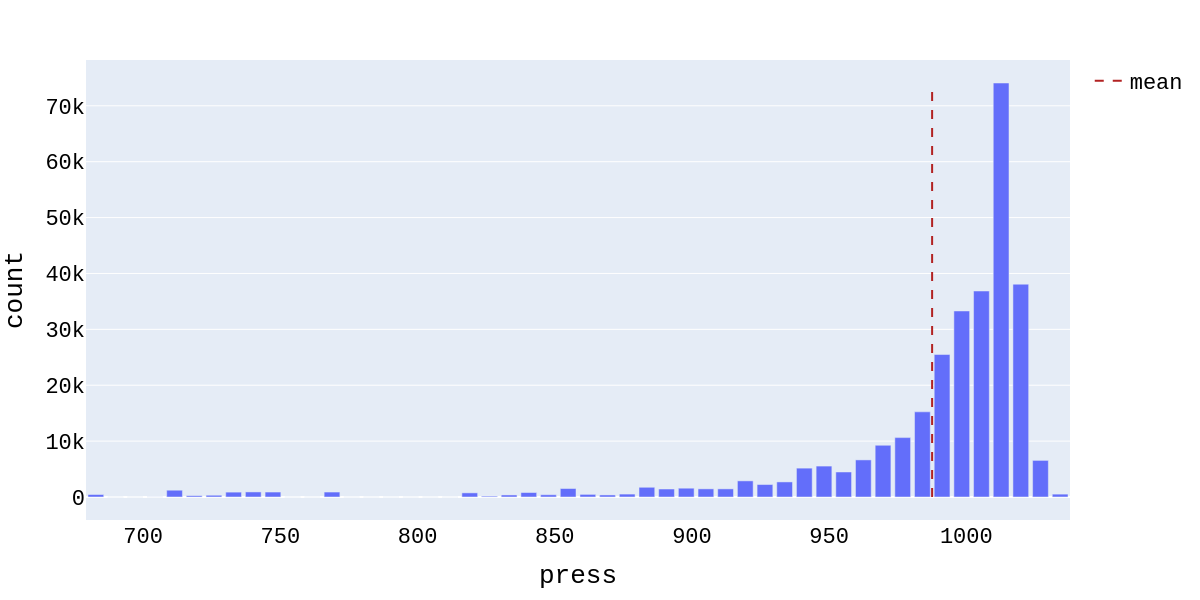

In [ ]:
# plotting its distribution with the mean
plot_distribution(df["press"], extra=df["press"].mean(), extra_name="mean")

# Exercises

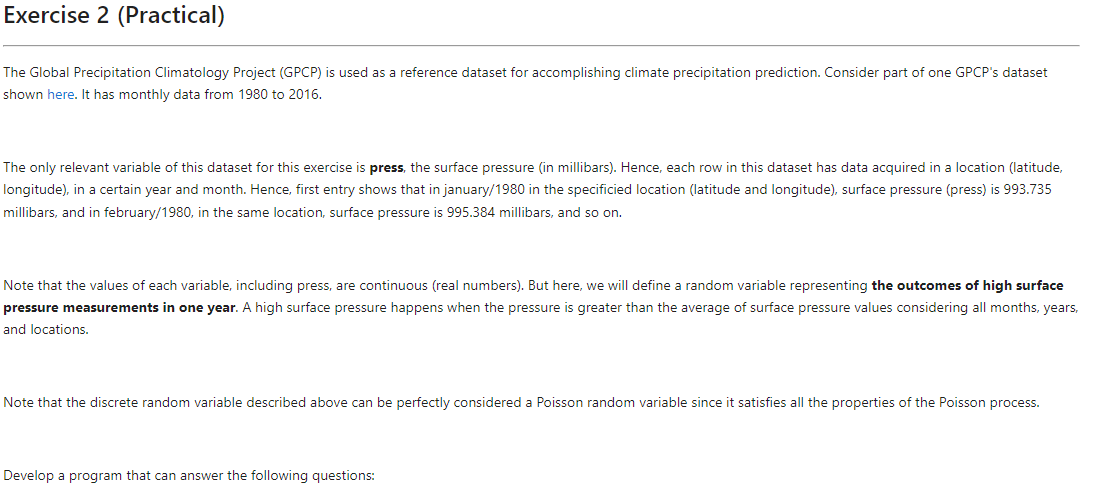

In [ ]:
# making a sliced dataframe to work on, looking for the values over the mean
# also called as "outcome of high surface pressure"
new_df = df[df["press"] > df["press"].mean()]
total = [len(new_df[new_df["year"] == i]) for i in range(1980,2017)]

In [ ]:
ini = 4000 #where my pmf starts
fim = 10001 #and where it finishes
xs = np.arange(ini,fim)
pmf = poisson.pmf(xs, mu=np.mean(total))
cdf = np.cumsum(np.array(pmf)/np.sum(pmf))

## 1. What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,600 (note: ',' means thousands)?

In [ ]:
print(f"Chance of being greater than 5600 = {(1-cdf[5600-ini])*100}%")

Chance of being greater than 5600 = 99.7130808723721%


## 2. What is the probability that the outcomes of high surface pressure measurements in one year is exactly 5,830?


In [ ]:
print(f"Chance of being less than 10000 = {(cdf[10000-ini])*100}%")

Chance of being less than 10000 = 99.99999999999987%


## 3. What is the probability that the outcomes of high surface pressure measurements in one year is less than or equal to 10,000?


In [ ]:
print(f"Chance of being exactly 5830 = {poisson.pmf(5830, mu=np.mean(total))*100}%")

Chance of being exactly 5830 = 0.5047262467734432%


## 4. What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,900?


In [ ]:
print(f"Chance of being greater than 5900 = {(1-cdf[5900-ini])*100}%")

Chance of being greater than 5900 = 11.758825846963738%


## 5. Show the probability histogram for this problem.


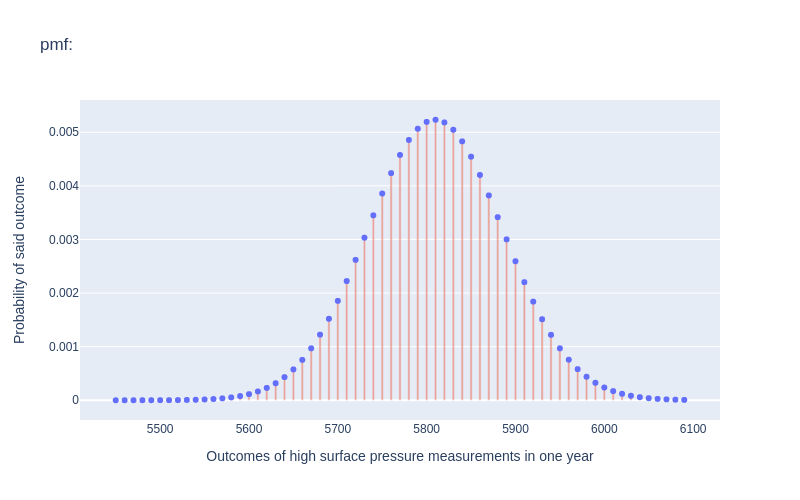

In [ ]:
ini = 5450 #where my pmf starts
fim = 6100 #and where it finishes
xs = np.arange(ini,fim, 10)
pmf = poisson.pmf(xs, mu=np.mean(total))
cdf = np.cumsum(np.array(pmf)/np.sum(pmf))

fig = go.FigureWidget()
fig.add_scatter(x=xs, y=pmf, mode='markers')
fig.add_bar(x=xs, y=pmf, marker = dict(opacity=0.5))
fig.layout = dict(showlegend = False,
                  bargap=0.75,
                  barmode='overlay',
                  width = 800,
                  title = "pmf:",
                  xaxis_title="Outcomes of high surface pressure measurements in one year",
                  yaxis_title="Probability of said outcome",
                  )
fig.show()



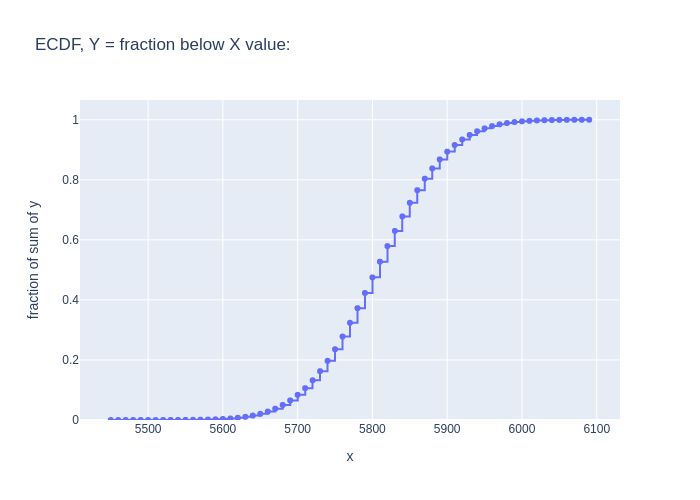

In [ ]:
px.ecdf(x = xs, y = pmf,  # Empirical Cumulative Distribution Function
        markers=True, 
        ecdfmode="standard", 
        title = "ECDF, Y = fraction below X value:",
        ).show()